# Project 1: An Analysis of Maternal Health Outcomes in America
## by Group 7: Mia Metni, Khadija Collymore and Christopher Wiggs
## 1. Research Question
### Are maternal mortality rates of women in America highest among black women (as opposed to women with other racial backgrounds)?

## 2. Hypothesis
### The elevated maternal mortality rates among black women in the United States compared to other racial groups stem from a complex interplay of factors:
- healthcare disparities, 
- socio-economic factors, 
- systemic biases, 
- limited access to quality healthcare, 
- economic inequality, 
- racial biases within healthcare systems 



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress

In [4]:
# Study data files
#disease_indicators = "Resources/U.S._Chronic_Disease_Indicators__CDI_.csv"
maternal_death = "Resources/VSRR_Provisional_Maternal_Death_Counts_and_Rates_20240207.csv"
live_births_edu = "Resources/US_Live_Births_Race_Edu.csv"
maternal_death_location = "Resources/mm_urban_rural_99-20.csv"

In [5]:
# Read CSV files
#disease_indicators_df = pd.read_csv(disease_indicators, dtype={'DataValueType': str}, low_memory=False) 
maternal_death_df = pd.read_csv(maternal_death, low_memory=False)
live_births_edu_df = pd.read_csv(live_births_edu, low_memory=False)
md_location_df = pd.read_csv(maternal_death_location, low_memory=False)

In [17]:
#Filter rows where race demographic is "black"
black_maternal_death = maternal_death_df[maternal_death_df['Subgroup'] == 'Black, Non-Hispanic']

In [18]:
black_maternal_death.to_csv('VSSR_Black_Maternal_Death_Counts.csv', index=False)

In [21]:
live_births_edu_df

,Notes,Mother's Single Race,Mother's Single Race Code,Mother's Education,Mother's Education Code,Births
0,NaN,American Indian or Alaska Native,1002-5,8th grade or less,1,1471.0
1,NaN,American Indian or Alaska Native,1002-5,9th through 12th grade with no diploma,2,6008.0
2,NaN,American Indian or Alaska Native,1002-5,High school graduate or GED completed,3,12969.0
3,NaN,American Indian or Alaska Native,1002-5,"Some college credit, but not a degree",4,8016.0
4,NaN,American Indian or Alaska Native,1002-5,"Associate degree (AA, AS)",5,2687.0
...,...,...,...,...,...,...
142,2003-2006 in CDC WONDER excluded Education and...,NaN,NaN,NaN,NaN,NaN
143,Standard Certificate of Live Birth. </p>,NaN,NaN,NaN,NaN,NaN
144,3. Single Race categories are not available fo...,NaN,NaN,NaN,NaN,NaN
145,"recoded to the Single Race category ""Not Avail...",NaN,NaN,NaN,NaN,NaN


In [22]:
# Drop specified columns
live_births_edu_df.drop(columns=["Mother's Single Race Code", "Notes", "Mother's Education Code"], inplace=True)

In [6]:
maternal_death_df

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,1/7/2024,United States,Total,Total,2019,1,12 month-ending,1/31/2019,660.0,3787776,17.4,NaN
1,1/7/2024,United States,Total,Total,2019,2,12 month-ending,2/28/2019,653.0,3783489,17.3,NaN
2,1/7/2024,United States,Total,Total,2019,3,12 month-ending,3/31/2019,657.0,3771682,17.4,NaN
3,1/7/2024,United States,Total,Total,2019,4,12 month-ending,4/30/2019,668.0,3772235,17.7,NaN
4,1/7/2024,United States,Total,Total,2019,5,12 month-ending,5/31/2019,706.0,3767999,18.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
565,1/7/2024,United States,Race and Hispanic origin,"White, Non-Hispanic",2023,5,12 month-ending,5/31/2023,309.0,1823992,16.9,NaN
566,1/7/2024,United States,Race and Hispanic origin,"White, Non-Hispanic",2023,6,12 month-ending,6/30/2023,296.0,1821388,16.3,NaN
567,1/7/2024,United States,Race and Hispanic origin,"White, Non-Hispanic",2023,7,12 month-ending,7/31/2023,287.0,1815013,15.8,NaN
568,1/7/2024,United States,Race and Hispanic origin,"White, Non-Hispanic",2023,8,12 month-ending,8/31/2023,286.0,1806212,15.8,NaN


In [114]:
# Rename column heading in maternal_death_df
maternal_death_df.rename(columns={"Subgroup": "Mother's Race"}, inplace=True)

# Rename column heading in live_births_edu_df
live_births_edu_df.rename(columns={"Mother's Single Race": "Mother's Race"}, inplace=True)

In [123]:
# Merge the two DataFrame
#mh_merged_df = pd.merge(maternal_death_df, live_births_edu_df, on="Mother's Race", how="left")

In [126]:
# Drop specified columns
maternal_death_df.drop(columns=["Data As Of", "Footnote"], inplace=True)

In [ ]:
maternal_death_df

In [7]:
# Group by "Year" and sum the "Maternal Deaths" column
maternal_deaths_totals = maternal_death_df.groupby("Year of Death")["Maternal Deaths"].sum().reset_index()

# Print the resulting DataFrame
print(maternal_deaths_totals)

   Year of Death  Maternal Deaths
0           2019          25240.0
1           2020          28339.0
2           2021          35381.0
3           2022          38819.0
4           2023          20062.0


Slope of the line: 4777.8999999984435
Correlation coefficient (r): 0.9876323129145643


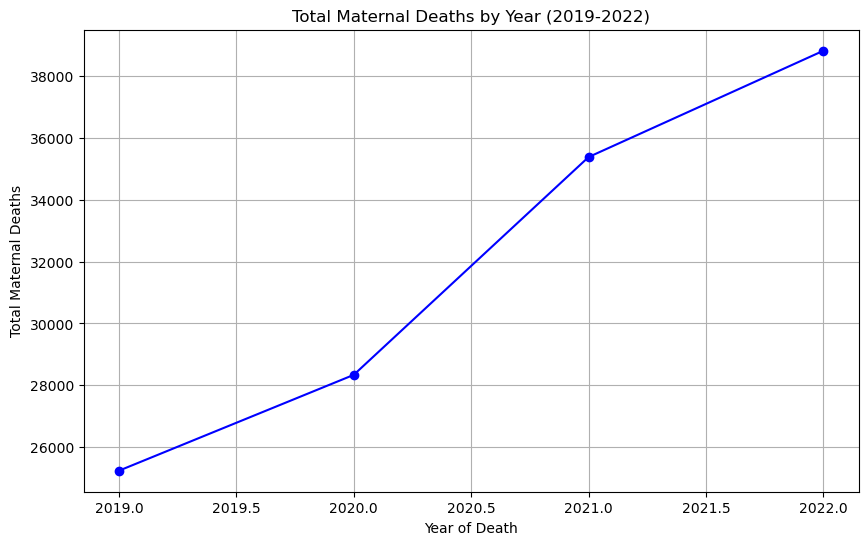

In [9]:
# Filter out year "2023.0" - this year seems to have partial data
filtered_data = maternal_deaths_totals[~maternal_deaths_totals["Year of Death"].isin([2023.0])]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Year of Death"], filtered_data["Maternal Deaths"], marker='o', color='b', linestyle='-')

# Add labels and title
plt.title('Total Maternal Deaths by Year (2019-2022)')
plt.xlabel('Year of Death')
plt.ylabel('Total Maternal Deaths')

# Show grid
plt.grid(True)

# Perform linear regression to get the slope and correlation coefficient
x = filtered_data["Year of Death"]
y = filtered_data["Maternal Deaths"]
slope, intercept = np.polyfit(x, y, 1)
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]

# Print the slope and correlation coefficient
print("Slope of the line:", slope)
print("Correlation coefficient (r):", correlation_coefficient)

# Show the plot
plt.show()

##  2. Location
### While more than half of pregnancy-related deaths happened in large metropolitan areas (76.3% - urban v. 23.7% - rural), the risk of dying from pregnancy-related causes is higher in rural areas. These disparities were found across urban and rural communities, and also varied across race/ethnicity. Recognizing the role that geographic location plays is crucial for designing initiatives that can prevent future deaths and eliminate these disparities.

In [53]:
md_location_df

,Year,Race,Race Code,Urban v. Rural,Deaths,Population
0,1999.0,American Indian or Alaska Native,1002-5,Medium Metro,11.0,272492.0
1,1999.0,American Indian or Alaska Native,1002-5,Micropolitan (Nonmetro),23.0,248052.0
2,1999.0,American Indian or Alaska Native,1002-5,NonCore (Nonmetro),15.0,234285.0
3,1999.0,Asian or Pacific Islander,A-PI,Large Central Metro,90.0,3163187.0
4,1999.0,Asian or Pacific Islander,A-PI,Large Fringe Metro,26.0,1276461.0
...,...,...,...,...,...,...
412,2020.0,White,2106-3,Large Fringe Metro,736.0,32732267.0
413,2020.0,White,2106-3,Medium Metro,761.0,28440146.0
414,2020.0,White,2106-3,Small Metro,375.0,12791019.0
415,2020.0,White,2106-3,Micropolitan (Nonmetro),338.0,11879121.0


In [ ]:
# Drop specified columns
md_location_df.drop(columns=["Year Code", "2013 Urbanization Code", "Crude Rate"], inplace=True)

In [23]:
# Rename column heading in md_location_df
md_location_df.rename(columns={"2013 Urbanization": "Urban v. Rural"}, inplace=True)
md_location_df.rename(columns={"% Deaths": "Deaths"}, inplace=True)

In [55]:
md_location_df

,Year,Race,Race Code,Urban v. Rural,Deaths,Population
0,1999.0,American Indian or Alaska Native,1002-5,Medium Metro,11.0,272492.0
1,1999.0,American Indian or Alaska Native,1002-5,Micropolitan (Nonmetro),23.0,248052.0
2,1999.0,American Indian or Alaska Native,1002-5,NonCore (Nonmetro),15.0,234285.0
3,1999.0,Asian or Pacific Islander,A-PI,Large Central Metro,90.0,3163187.0
4,1999.0,Asian or Pacific Islander,A-PI,Large Fringe Metro,26.0,1276461.0
...,...,...,...,...,...,...
412,2020.0,White,2106-3,Large Fringe Metro,736.0,32732267.0
413,2020.0,White,2106-3,Medium Metro,761.0,28440146.0
414,2020.0,White,2106-3,Small Metro,375.0,12791019.0
415,2020.0,White,2106-3,Micropolitan (Nonmetro),338.0,11879121.0


In [56]:
# Replace NaN values with 0
md_location3_df = md_location_df

In [57]:
md_location3_df

,Year,Race,Race Code,Urban v. Rural,Deaths,Population
0,1999.0,American Indian or Alaska Native,1002-5,Medium Metro,11.0,272492.0
1,1999.0,American Indian or Alaska Native,1002-5,Micropolitan (Nonmetro),23.0,248052.0
2,1999.0,American Indian or Alaska Native,1002-5,NonCore (Nonmetro),15.0,234285.0
3,1999.0,Asian or Pacific Islander,A-PI,Large Central Metro,90.0,3163187.0
4,1999.0,Asian or Pacific Islander,A-PI,Large Fringe Metro,26.0,1276461.0
...,...,...,...,...,...,...
412,2020.0,White,2106-3,Large Fringe Metro,736.0,32732267.0
413,2020.0,White,2106-3,Medium Metro,761.0,28440146.0
414,2020.0,White,2106-3,Small Metro,375.0,12791019.0
415,2020.0,White,2106-3,Micropolitan (Nonmetro),338.0,11879121.0


In [58]:
md_location3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            417 non-null    float64
 1   Race            417 non-null    object 
 2   Race Code       417 non-null    object 
 3   Urban v. Rural  417 non-null    object 
 4   Deaths          417 non-null    float64
 5   Population      417 non-null    float64
dtypes: float64(3), object(3)
memory usage: 22.8+ KB


In [60]:
md_location3_df_subset = md_location3_df[["Year", "Deaths", "Population"]]

# Check the first few rows of the subset DataFrame
print(md_location3_df_subset.head())


     Year  Deaths  Population
0  1999.0    11.0    272492.0
1  1999.0    23.0    248052.0
2  1999.0    15.0    234285.0
3  1999.0    90.0   3163187.0
4  1999.0    26.0   1276461.0


In [61]:
# Group by Year and calculate the total deaths and population
yearly_totals = md_location3_df.groupby("Year").agg(Total_Deaths=("Deaths", "sum"), Total_Population=("Population", "sum")).reset_index()

# Calculate the mortality percentage for each year
yearly_totals["Mortality_Percentage"] = (yearly_totals["Total_Deaths"] / yearly_totals["Total_Population"]) * 100

# Print the resulting DataFrame
print(yearly_totals)


      Year  Total_Deaths  Total_Population  Mortality_Percentage
0   1999.0        6592.0       141161158.0              0.004670
1   2000.0        6471.0       141942104.0              0.004559
2   2001.0        6407.0       143960206.0              0.004451
3   2002.0        6560.0       145026008.0              0.004523
4   2003.0        6685.0       146064513.0              0.004577
5   2004.0        6798.0       148273709.0              0.004585
6   2005.0        7088.0       148738286.0              0.004765
7   2006.0        7065.0       149884163.0              0.004714
8   2007.0        7123.0       152277762.0              0.004678
9   2008.0        6778.0       153319436.0              0.004421
10  2009.0        6647.0       154498213.0              0.004302
11  2010.0        6135.0       155579001.0              0.003943
12  2011.0        6273.0       158003444.0              0.003970
13  2012.0        6212.0       158809262.0              0.003912
14  2013.0        6466.0 

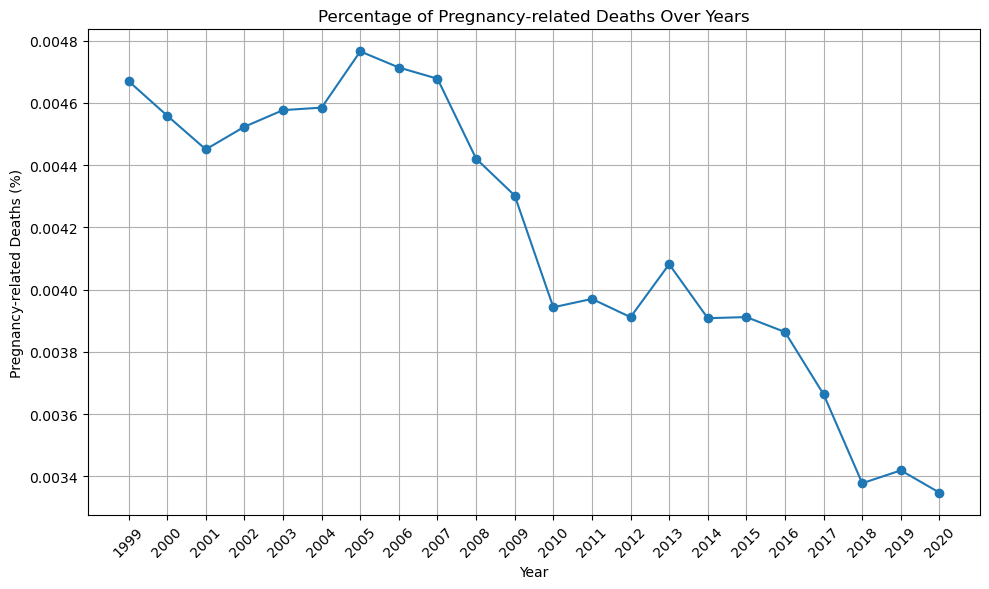

In [62]:
# Create line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals["Year"], yearly_totals["Mortality_Percentage"], marker='o', linestyle='-')
plt.title('Percentage of Pregnancy-related Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Pregnancy-related Deaths (%)')
plt.grid(True)
plt.xticks(yearly_totals["Year"], rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

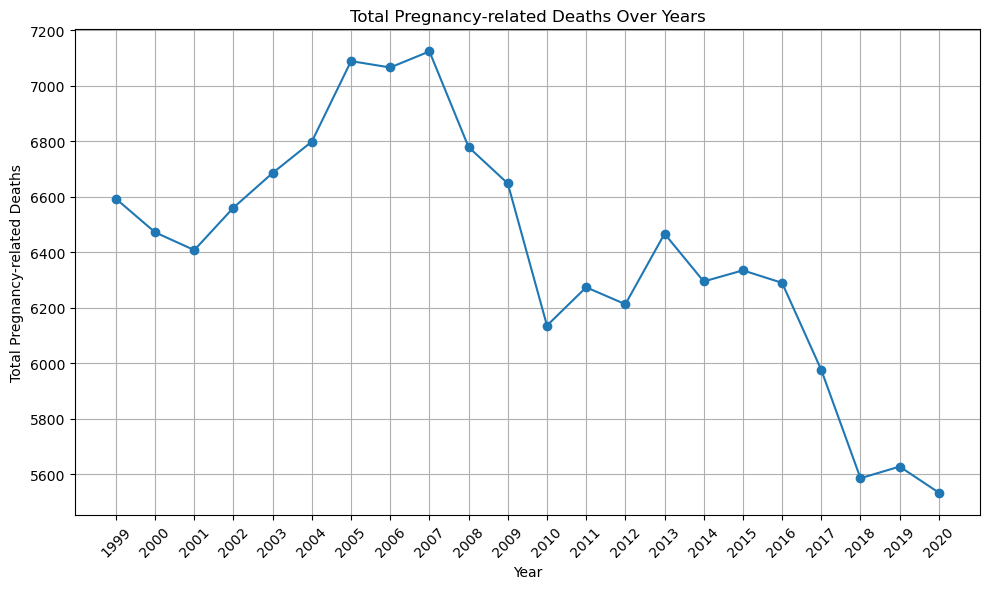

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals["Year"], yearly_totals["Total_Deaths"], marker='o', linestyle='-')
plt.title('Total Pregnancy-related Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Total Pregnancy-related Deaths')
plt.grid(True)
plt.xticks(yearly_totals["Year"], rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [71]:
# Group by Race and sum the Deaths and Population
total_deaths_by_race = md_location3_df.groupby("Race").agg(
    Total_Deaths=("Deaths", "sum"),
    Total_Population=("Population", "sum")
).reset_index()

# Calculate the mortality rate per 1000 population for each race
total_deaths_by_race["Mortality_Rate_Per_1000"] = (total_deaths_by_race["Total_Deaths"] / total_deaths_by_race["Total_Population"]) * 1000

# Print the resulting DataFrame
print(total_deaths_by_race)

                               Race  Total_Deaths  Total_Population  \
0  American Indian or Alaska Native        1086.0      2.348736e+07   
1         Asian or Pacific Islander        5044.0      1.847941e+08   
2         Black or African American       49017.0      4.795886e+08   
3                             White       85790.0      2.712092e+09   

   Mortality_Rate_Per_1000  
0                 0.046238  
1                 0.027295  
2                 0.102206  
3                 0.031632  


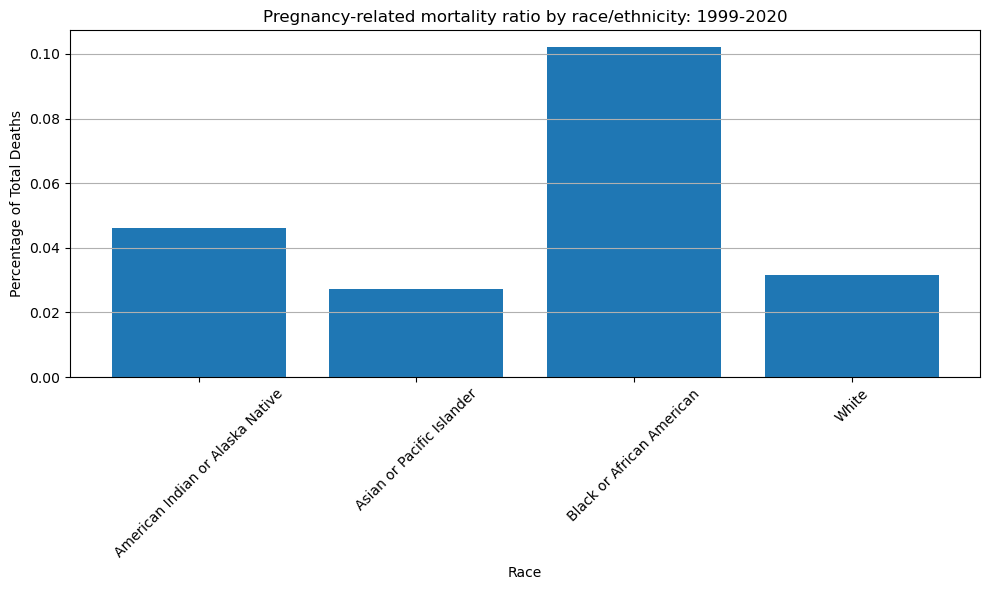

In [99]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_deaths_by_race["Race"], total_deaths_by_race["Mortality_Rate_Per_1000"])
plt.title('Pregnancy-related mortality ratio by race/ethnicity: 1999-2020')
plt.xlabel('Race')
plt.ylabel('Percentage of Total Deaths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [86]:
# Group by both "Race" and "Urban v. Rural" and sum the "Deaths"
deaths_by_race_urban_rural = md_location3_df.groupby(["Race", "Urban v. Rural"])["Deaths"].sum().reset_index()

# Pivot the table for better visualization
deaths_by_race_urban_rural_pivot = deaths_by_race_urban_rural.pivot_table(index='Race', columns='Urban v. Rural', values='Deaths', aggfunc='sum')

# Fill NaN values with 0
deaths_by_race_urban_rural_pivot = deaths_by_race_urban_rural_pivot.fillna(0)

# Print the resulting DataFrame
print(deaths_by_race_urban_rural_pivot)


Urban v. Rural                    Large Central Metro  Large Fringe Metro  \
Race                                                                        
American Indian or Alaska Native                 96.0                34.0   
Asian or Pacific Islander                      2521.0              1277.0   
Black or African American                     21256.0             10058.0   
White                                         25125.0             19344.0   

Urban v. Rural                    Medium Metro  Micropolitan (Nonmetro)  \
Race                                                                      
American Indian or Alaska Native         130.0                    384.0   
Asian or Pacific Islander               1029.0                     82.0   
Black or African American               9496.0                   2558.0   
White                                  19085.0                   8342.0   

Urban v. Rural                    NonCore (Nonmetro)  Small Metro  
Race              

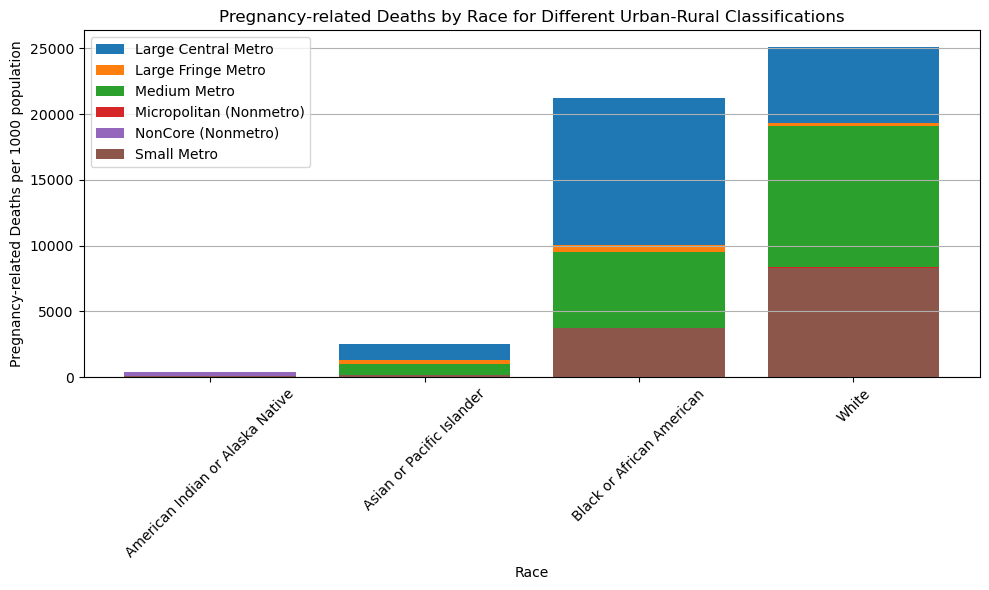

In [89]:
# Plot a bar chart for each urban-rural classification
plt.figure(figsize=(10, 6))
for classification in deaths_by_race_urban_rural_pivot.columns:
    plt.bar(deaths_by_race_urban_rural_pivot.index, deaths_by_race_urban_rural_pivot[classification], label=classification)

plt.title('Pregnancy-related Deaths by Race for Different Urban-Rural Classifications')
plt.xlabel('Race')
plt.ylabel('Pregnancy-related Deaths per 1000 population')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [94]:
# Calculate the total population for each urban-rural classification
total_population_by_classification = md_location3_df.groupby("Urban v. Rural")["Population"].sum()
total_population_by_classification

Urban v. Rural
Large Central Metro        1.046747e+09
Large Fringe Metro         8.388034e+08
Medium Metro               7.084517e+08
Micropolitan (Nonmetro)    2.934164e+08
NonCore (Nonmetro)         2.064060e+08
Small Metro                3.061382e+08
Name: Population, dtype: float64

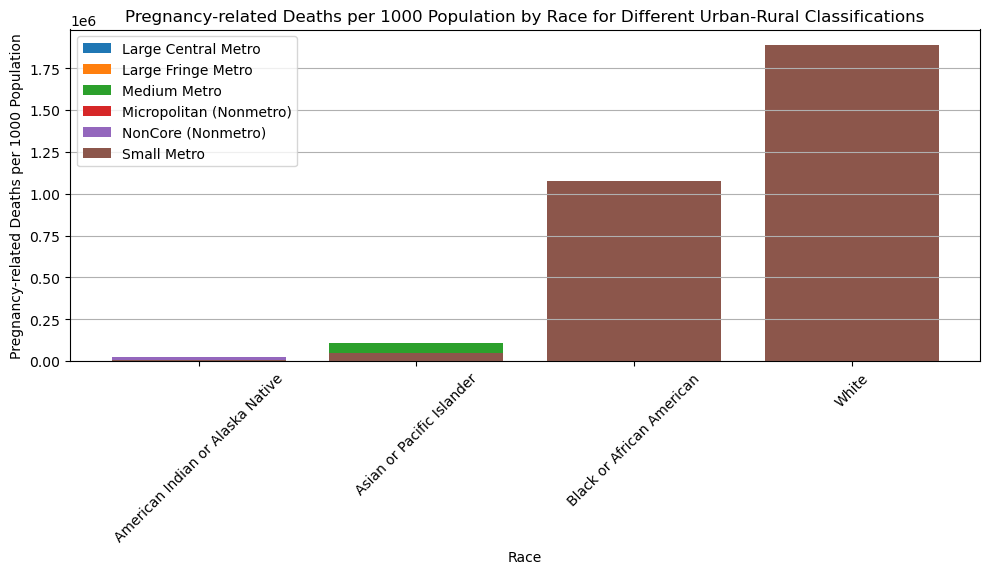

In [98]:
# Merge total_deaths_by_race with md_location3_df to get the urban-rural classification for each racial group
merged_df = pd.merge(total_deaths_by_race, md_location3_df, on="Race")

# Group by both "Urban v. Rural" and "Race" and calculate the total deaths per 1000 population
deaths_per_1000_population_by_classification = merged_df.groupby(["Urban v. Rural", "Race"])["Total_Deaths"]

# Pivot the table for better visualization
#deaths_per_1000_population_by_classification_pivot = deaths_per_1000_population_by_classification.unstack()

# Plot a bar chart for each urban-rural classification
plt.figure(figsize=(10, 6))
for classification in deaths_per_1000_population_by_classification_pivot.index:
    plt.bar(deaths_per_1000_population_by_classification_pivot.columns, deaths_per_1000_population_by_classification_pivot.loc[classification], label=classification)

plt.title('Pregnancy-related Deaths per 1000 Population by Race for Different Urban-Rural Classifications')
plt.xlabel('Race')
plt.ylabel('Pregnancy-related Deaths per 1000 Population')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [100]:
# Group by "Urban v. Rural" and sum the "Deaths" and "Population" columns
urban_rural_totals = md_location3_df.groupby("Urban v. Rural").agg(
    Total_Deaths=("Deaths", "sum"),
    Total_Population=("Population", "sum")
).reset_index()

# Calculate the pregnancy-related mortality ratio
urban_rural_totals["Mortality_Ratio"] = urban_rural_totals["Total_Deaths"] / urban_rural_totals["Total_Population"]

# Print the resulting DataFrame
print(urban_rural_totals)

            Urban v. Rural  Total_Deaths  Total_Population  Mortality_Ratio
0      Large Central Metro       48998.0      1.046747e+09         0.000047
1       Large Fringe Metro       30713.0      8.388034e+08         0.000037
2             Medium Metro       29740.0      7.084517e+08         0.000042
3  Micropolitan (Nonmetro)       11366.0      2.934164e+08         0.000039
4       NonCore (Nonmetro)        7904.0      2.064060e+08         0.000038
5              Small Metro       12216.0      3.061382e+08         0.000040


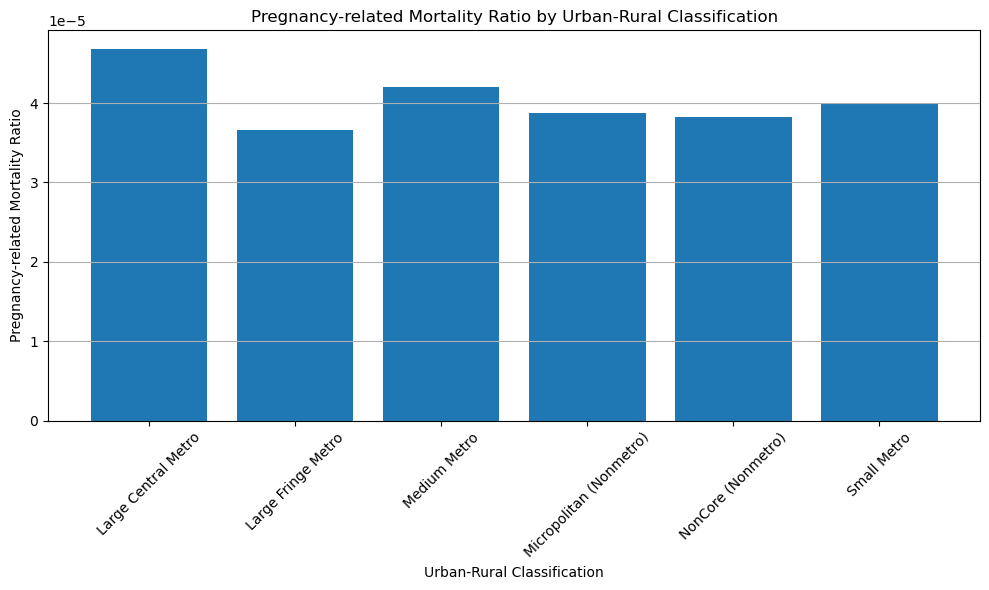

In [101]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(urban_rural_totals["Urban v. Rural"], urban_rural_totals["Mortality_Ratio"])
plt.title('Pregnancy-related Mortality Ratio by Urban-Rural Classification')
plt.xlabel('Urban-Rural Classification')
plt.ylabel('Pregnancy-related Mortality Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [102]:
# Group by both "Race" and "Urban v. Rural" and sum the "Population" column
population_by_race_urban_rural = md_location3_df.groupby(["Race", "Urban v. Rural"])["Population"].sum().reset_index()

# Pivot the table for better visualization
population_by_race_urban_rural_pivot = population_by_race_urban_rural.pivot_table(index='Race', columns='Urban v. Rural', values='Population', aggfunc='sum')

# Fill NaN values with 0
population_by_race_urban_rural_pivot = population_by_race_urban_rural_pivot.fillna(0)

# Print the resulting DataFrame
print(population_by_race_urban_rural_pivot)

Urban v. Rural                    Large Central Metro  Large Fringe Metro  \
Race                                                                        
American Indian or Alaska Native            4498292.0            717804.0   
Asian or Pacific Islander                  99877613.0          48331238.0   
Black or African American                 211764779.0         107804123.0   
White                                     730606124.0         681950274.0   

Urban v. Rural                    Medium Metro  Micropolitan (Nonmetro)  \
Race                                                                      
American Indian or Alaska Native     4544479.0                6724297.0   
Asian or Pacific Islander           31139502.0                1731988.0   
Black or African American           85141801.0               24489845.0   
White                              587625923.0              260470231.0   

Urban v. Rural                    NonCore (Nonmetro)  Small Metro  
Race              

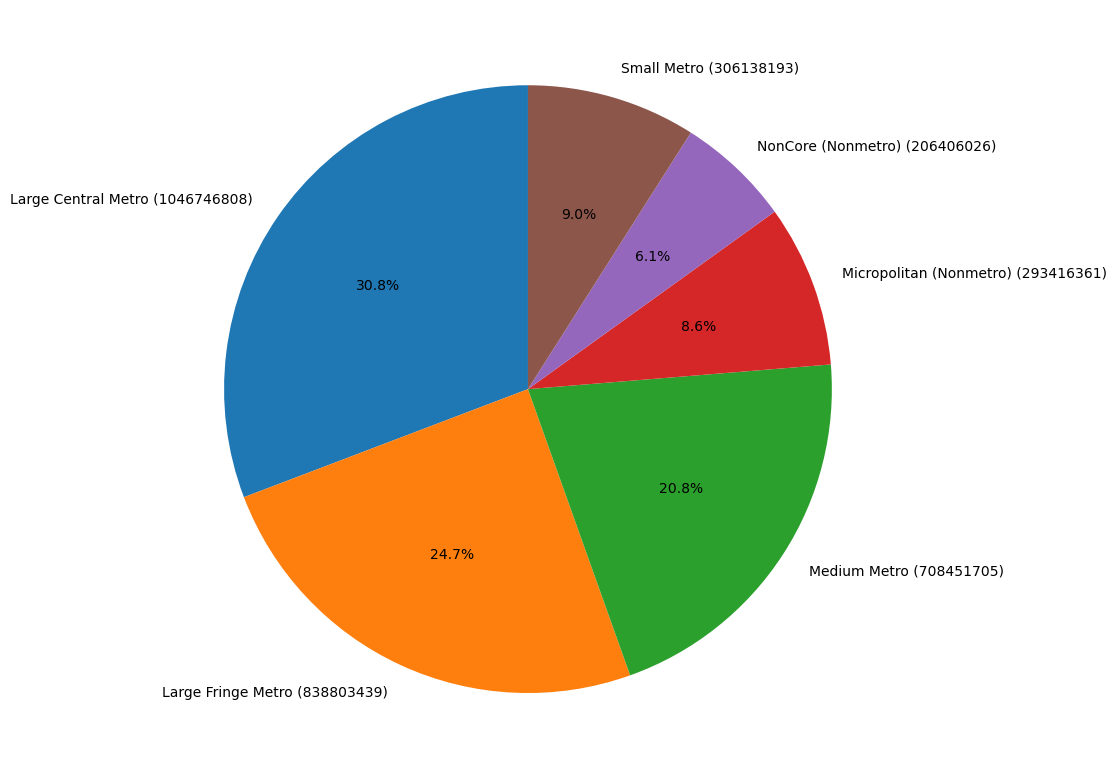

In [109]:
# Group by both "Urban v. Rural" and "Race" and sum the "Population" column
population_by_race_urban_rural = md_location3_df.groupby(["Urban v. Rural", "Race"])["Population"].sum().reset_index()

# Pivot the table for better visualization
population_by_race_urban_rural_pivot = population_by_race_urban_rural.pivot_table(index='Urban v. Rural', columns='Race', values='Population', aggfunc='sum')

# Plot a single pie chart for all urban-rural classifications
fig, ax = plt.subplots(figsize=(10, 8))

# Combine the populations for each race within each urban-rural classification
total_population_by_classification = population_by_race_urban_rural_pivot.sum(axis=1)

# Prepare labels and explode array for pie chart
labels = []
population_data = []
explode = []

for classification in population_by_race_urban_rural_pivot.index:
    total_population = total_population_by_classification.loc[classification]
    labels.append(f"{classification} ({total_population:.0f})")
    population_data.append(total_population)
    explode.append(0)

# Plot the pie chart
ax.pie(population_data, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()


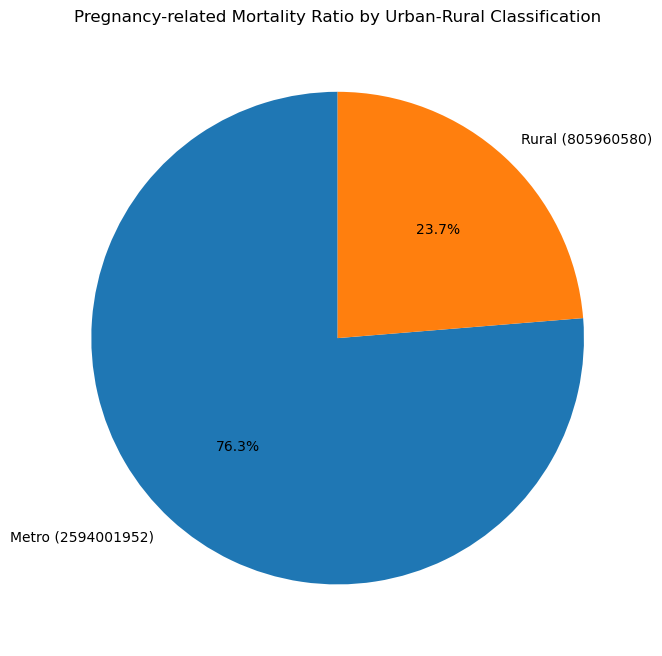

In [112]:
# Group by both "Urban v. Rural" and "Race" and sum the "Population" column
population_by_race_urban_rural = md_location3_df.groupby(["Urban v. Rural", "Race"])["Population"].sum().reset_index()

# Combine "Large Central Metro", "Large Fringe Metro", and "Medium Metro" into one category
population_by_race_urban_rural["Urban v. Rural"] = population_by_race_urban_rural["Urban v. Rural"].replace({"Large Central Metro": "Metro", "Large Fringe Metro": "Metro", "Medium Metro": "Metro"})

# Combine "Small Metro", "NonCore (Nonmetro)", and "Micropolitan (Nonmetro)" into one category
population_by_race_urban_rural["Urban v. Rural"] = population_by_race_urban_rural["Urban v. Rural"].replace({"Small Metro": "Rural", "NonCore (Nonmetro)": "Rural", "Micropolitan (Nonmetro)": "Rural"})

# Pivot the table for better visualization
population_by_race_urban_rural_pivot = population_by_race_urban_rural.pivot_table(index='Urban v. Rural', columns='Race', values='Population', aggfunc='sum')

# Plot a single pie chart for all urban-rural classifications
fig, ax = plt.subplots(figsize=(7, 7))

# Combine the populations for each race within each urban-rural classification
total_population_by_classification = population_by_race_urban_rural_pivot.sum(axis=1)

# Prepare labels and explode array for pie chart
labels = []
population_data = []
explode = []

for classification in population_by_race_urban_rural_pivot.index:
    total_population = total_population_by_classification.loc[classification]
    labels.append(f"{classification} ({total_population:.0f})")
    population_data.append(total_population)
    explode.append(0)

# Plot the pie chart
ax.pie(population_data, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

# Add title to the pie chart
plt.title('Pregnancy-related Mortality Ratio by Urban-Rural Classification')

plt.tight_layout()
plt.show()